# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import circs, Hammifier

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit3 import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Noise Model

In [3]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [4]:
 noise_model = generateNoiseModel(machine, coherent = True, incoherent = True, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [5]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [6]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(d, u)
        p2 = random.uniform(d, u)
        p3 = random.uniform(d, u)


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
Noisy diff is 0.025226074218749894
Mitigated diff is 0.018120727852101393
1
Noisy diff is -0.06949658203124998
Mitigated diff is -0.016964400779342137
2
Noisy diff is 0.06598852539062505
Mitigated diff is 0.05130718655801658
3
Noisy diff is -0.011800781250000003
Mitigated diff is 0.02355109681442691
4
Noisy diff is 0.014574218749999979
Mitigated diff is 0.006043883547008577
5
Noisy diff is -0.007293457031250006
Mitigated diff is -0.010651312218597386
6
Noisy diff is -0.06335668945312499
Mitigated diff is -0.014000839080624232
7
Noisy diff is 0.04312866210937499
Mitigated diff is 0.029052452614659663
8
Noisy diff is 0.02184326171874995
Mitigated diff is 0.021938695782299344
9
Noisy diff is 0.04573535156249997
Mitigated diff is 0.03899941746079438
10
Noisy diff is -0.042337890624999985
Mitigated diff is 0.0045282540159493345
11
Noisy diff is -0.026802246093749996
Mitigated diff is -0.014917310196314093
12
Noisy diff is -0.013489013671874994
Mitigated diff is 0.012503504495454232
13
Noi

Noisy diff is -0.005229248046874968
Mitigated diff is 0.005474366128772223
108
Noisy diff is -0.02477978515625001
Mitigated diff is 0.011534762632481543
109
Noisy diff is -0.035821044921874996
Mitigated diff is -0.020478251454769336
110
Noisy diff is -0.02735327148437497
Mitigated diff is 0.007027098416991007
111
Noisy diff is 0.020160156249999894
Mitigated diff is 0.005833789128088962
112
Noisy diff is -0.03955371093750001
Mitigated diff is -0.007112247989640565
113
Noisy diff is 0.000995361328125055
Mitigated diff is 0.004492906297224208
114
Noisy diff is -0.016957275390625026
Mitigated diff is 0.02573990875478921
115
Noisy diff is 0.07598974609374987
Mitigated diff is 0.03377334783272279
116
Noisy diff is -0.011237792968749966
Mitigated diff is 0.01711377370459402
117
Noisy diff is 0.061555419921875076
Mitigated diff is 0.04187077961643404
118
Noisy diff is -0.08762744140624995
Mitigated diff is -0.042542628700180884
119
Noisy diff is -0.007312988281249988
Mitigated diff is 0.012157

Noisy diff is 0.0323251953125
Mitigated diff is 0.01917141921518195
214
Noisy diff is 0.008124511718750005
Mitigated diff is 0.00306177801148505
215
Noisy diff is 0.028641601562499952
Mitigated diff is 0.03774274939014033
216
Noisy diff is -0.03989599609375
Mitigated diff is -0.0035837746942727483
217
Noisy diff is -0.0007373046874999956
Mitigated diff is 0.01604344451121792
218
Noisy diff is -0.027469482421875004
Mitigated diff is -0.001981755988152468
219
Noisy diff is -0.01858325195312499
Mitigated diff is 0.004588553731091266
220
Noisy diff is -0.027528320312499938
Mitigated diff is 0.012469413144364339
221
Noisy diff is -0.07424267578125004
Mitigated diff is -0.01636740451388896
222
Noisy diff is -0.03320654296875
Mitigated diff is 0.012808414870558088
223
Noisy diff is -0.03778784179687501
Mitigated diff is -0.005507877433237426
224
Noisy diff is -0.05114428710937501
Mitigated diff is -0.01633456734310127
225
Noisy diff is -0.033375732421875005
Mitigated diff is -0.01149141095452

Noisy diff is 0.07070849609375007
Mitigated diff is 0.05523607653106499
320
Noisy diff is 0.004881591796875029
Mitigated diff is -0.005723513499912292
321
Noisy diff is -0.04695043945312502
Mitigated diff is 0.0032047779423267364
322
Noisy diff is -0.03526562500000001
Mitigated diff is -0.011008109940190018
323
Noisy diff is -0.05253393554687501
Mitigated diff is 0.010809301429906902
324
Noisy diff is -0.08665551757812506
Mitigated diff is -0.024000659686450765
325
Noisy diff is 0.035532714843750035
Mitigated diff is 0.021496346596091176
326
Noisy diff is -0.010442626953124978
Mitigated diff is 0.03347355824958598
327
Noisy diff is 0.01957543945312501
Mitigated diff is 0.011241014611473588
328
Noisy diff is 0.01129663085937499
Mitigated diff is 0.009229573269612323
329
Noisy diff is 0.012537597656249955
Mitigated diff is 0.02479348705318296
330
Noisy diff is -0.012062011718750015
Mitigated diff is 0.008870593664148385
331
Noisy diff is 0.05965209960937501
Mitigated diff is 0.0523587633

Noisy diff is -0.0307236328125
Mitigated diff is -0.0014797304258241661
426
Noisy diff is 0.014563964843749944
Mitigated diff is 0.02529373002756785
427
Noisy diff is 0.010409667968750091
Mitigated diff is 0.019745059833829404
428
Noisy diff is -0.07227319335937504
Mitigated diff is -0.007351793343919832
429
Noisy diff is 0.04173095703125007
Mitigated diff is 0.027782684314991923
430
Noisy diff is 0.052217041015625076
Mitigated diff is 0.029679262393006334
431
Noisy diff is -0.041921630859375
Mitigated diff is -0.003961849427394984
432
Noisy diff is -0.03469042968750001
Mitigated diff is 0.00924404803638202
433
Noisy diff is -0.09715551757812502
Mitigated diff is -0.019487684402186345
434
Noisy diff is 0.008163818359374964
Mitigated diff is 0.027239946116166813
435
Noisy diff is 0.03571215820312501
Mitigated diff is 0.022845443213170835
436
Noisy diff is -0.016028808593749985
Mitigated diff is -0.011382365361021642
437
Noisy diff is 0.04507373046875007
Mitigated diff is 0.0408959298350

Noisy diff is 0.09248974609374994
Mitigated diff is 0.06402709993732059
532
Noisy diff is -0.003565917968749943
Mitigated diff is 0.015005764103518116
533
Noisy diff is -0.06318896484375001
Mitigated diff is -0.017518742309123203
534
Noisy diff is 0.04597045898437491
Mitigated diff is 0.05300801955295398
535
Noisy diff is -0.07679785156249996
Mitigated diff is -0.026714004848233386
536
Noisy diff is 0.017488525390624954
Mitigated diff is 0.03794959824273597
537
Noisy diff is -0.008328369140624986
Mitigated diff is 0.01780504444015185
538
Noisy diff is -0.020999755859374997
Mitigated diff is -0.016007952247405366
539
Noisy diff is -0.025859130859375024
Mitigated diff is 0.00817176315438034
540
Noisy diff is -0.10773266601562492
Mitigated diff is -0.036991504615631776
541
Noisy diff is -0.011330322265624998
Mitigated diff is 0.026977633857028394
542
Noisy diff is 0.008942382812500038
Mitigated diff is 0.016203010129585027
543
Noisy diff is -0.008300048828124962
Mitigated diff is 0.009413

Noisy diff is -0.021652099609375017
Mitigated diff is 0.0001018222925761661
638
Noisy diff is 0.04864013671874989
Mitigated diff is 0.022047734887725268
639
Noisy diff is 0.061219970703124904
Mitigated diff is 0.05003225196027916
640
Noisy diff is 0.033387695312500076
Mitigated diff is 0.018424804091307978
641
Noisy diff is 0.009159667968749993
Mitigated diff is 0.012026809740823402
642
Noisy diff is -0.07243359375
Mitigated diff is -0.00878717693180256
643
Noisy diff is -0.003825439453124968
Mitigated diff is 0.021410474914625333
644
Noisy diff is -0.007347900390624995
Mitigated diff is 0.01928956234737489
645
Noisy diff is -0.01624487304687494
Mitigated diff is 0.024192320860586702
646
Noisy diff is -0.014764648437500028
Mitigated diff is 0.007792278300041949
647
Noisy diff is 0.016849365234374997
Mitigated diff is 0.049087891161572805
648
Noisy diff is 0.024891357421874982
Mitigated diff is 0.02527193172267095
649
Noisy diff is -0.007385009765625006
Mitigated diff is 0.0097230255764

Noisy diff is -0.066179931640625
Mitigated diff is -0.029830872789320062
744
Noisy diff is -0.03817700195312501
Mitigated diff is -0.009866708401228011
745
Noisy diff is 0.062251220703125054
Mitigated diff is 0.06516702146410203
746
Noisy diff is -0.009635253906249974
Mitigated diff is 0.010127029020241984
747
Noisy diff is -0.025072753906249995
Mitigated diff is 0.0010567346444787934
748
Noisy diff is 0.037297363281249996
Mitigated diff is 0.011289496766254459
749
Noisy diff is -0.009578124999999937
Mitigated diff is 0.018859150712568717
750
Noisy diff is -0.05726318359375003
Mitigated diff is -0.009528450461214144
751
Noisy diff is 0.01002514648437497
Mitigated diff is 0.007052778612446575
752
Noisy diff is 0.04399414062500001
Mitigated diff is 0.03026185296920797
753
Noisy diff is -0.004576660156249995
Mitigated diff is -0.0063586895580547975
754
Noisy diff is -0.041038085937499996
Mitigated diff is -0.032879694475446426
755
Noisy diff is -0.004820800781250023
Mitigated diff is 0.01

Noisy diff is -0.016907226562499933
Mitigated diff is 0.011123959346859724
849
Noisy diff is 0.06499243164062507
Mitigated diff is 0.03624782539243765
850
Noisy diff is 0.07084033203124995
Mitigated diff is 0.045809799727182576
851
Noisy diff is 0.017136230468750013
Mitigated diff is 0.01822752296335023
852
Noisy diff is -0.013896728515625012
Mitigated diff is 0.0071413449614620705
853
Noisy diff is -0.020261230468749947
Mitigated diff is 0.01569984642094019
854
Noisy diff is -0.027695068359375005
Mitigated diff is -0.013508540271577383
855
Noisy diff is 0.004310791015624982
Mitigated diff is 0.02433358850351036
856
Noisy diff is 0.029911376953124957
Mitigated diff is 0.00811101947640036
857
Noisy diff is 0.022843261718750063
Mitigated diff is 0.01341724622491225
858
Noisy diff is -0.0018176269531249845
Mitigated diff is -0.002105291919452079
859
Noisy diff is 0.01549951171874997
Mitigated diff is 0.011660359730330416
860
Noisy diff is -0.038070556640625
Mitigated diff is -0.0154054300

Noisy diff is -0.05499462890625001
Mitigated diff is -0.012224071967529018
955
Noisy diff is -0.019325927734374915
Mitigated diff is 0.004639783965203814
956
Noisy diff is 0.0024196777343749865
Mitigated diff is 0.008953648396958919
957
Noisy diff is 0.0627304687500001
Mitigated diff is 0.03019997943137598
958
Noisy diff is 0.007829101562500052
Mitigated diff is 0.008538179133689261
959
Noisy diff is -0.004018066406249909
Mitigated diff is 0.00955574973529083
960
Noisy diff is -0.04613452148437499
Mitigated diff is -0.015105072025211025
961
Noisy diff is -0.02149633789062494
Mitigated diff is 0.011802747789320112
962
Noisy diff is 0.011652343750000016
Mitigated diff is 0.021867235076121816
963
Noisy diff is 0.06470043945312509
Mitigated diff is 0.04920189535290298
964
Noisy diff is 0.03116259765625007
Mitigated diff is 0.01853553703783206
965
Noisy diff is 0.057751220703124995
Mitigated diff is 0.049053394887339286
966
Noisy diff is 0.007945312500000024
Mitigated diff is 0.013916139513

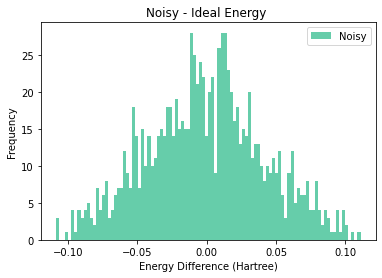

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "mediumaquamarine", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy_full_3.png', dpi = 1000)

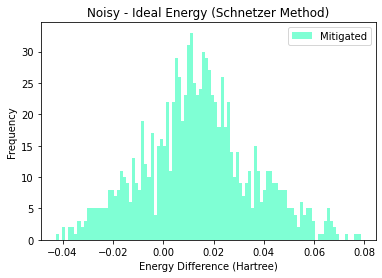

In [8]:
a = plt.figure()
#plt.hist(diff_r, bins=100, color = "red", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "aquamarine", label = 'Mitigated')
plt.title("Noisy - Ideal Energy (Schnetzer Method)")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_Mitigated_full_3.png', dpi = 1000)

In [9]:
energies

[[[0.6403404627407925, -1.0598555720691425, -1.8152059662263433],
  -0.5750155339657936,
  -0.5497894597470437,
  -0.5568948061136922],
 [[1.3783205481698406, 1.4961176809041747, -2.8766513264637554],
  0.27988314767483125,
  0.21038656564358127,
  0.2629187468954891],
 [[-0.8277431282113392, 2.962241048014759, -0.4987300273539943],
  -0.7919667058407939,
  -0.7259781804501688,
  -0.7406595192827773],
 [[-1.0636160344977967, -1.6792009283822618, 0.6596294470305795],
  -0.3841542058407938,
  -0.3959549870907938,
  -0.3606031090263669],
 [[2.5313405277615946, -1.4059029704691512, 2.0291770830233347],
  -0.5251925359189187,
  -0.5106183171689187,
  -0.5191486523719101],
 [[0.9548280630605701, -0.5304862944912472, 2.6066601853553655],
  -0.20901919607516883,
  -0.21631265310641884,
  -0.21967050829376622],
 [[3.0340861599958, -2.4871487051610934, -1.506215977989448],
  -0.00033169607516880415,
  -0.0636883855282938,
  -0.014332535155793037],
 [[1.2656039903640801, 1.371648158373425, 2.3621

In [10]:
diff_r

[0.025226074218749894,
 -0.06949658203124998,
 0.06598852539062505,
 -0.011800781250000003,
 0.014574218749999979,
 -0.007293457031250006,
 -0.06335668945312499,
 0.04312866210937499,
 0.02184326171874995,
 0.04573535156249997,
 -0.042337890624999985,
 -0.026802246093749996,
 -0.013489013671874994,
 0.007865966796875012,
 -0.00037377929687498757,
 -0.047141601562499996,
 -0.0416435546875,
 0.07776684570312498,
 0.03735449218749998,
 -0.027759033203124978,
 0.0028527832031250977,
 0.024940185546874993,
 0.00045092773437502287,
 0.014372558593750029,
 0.008291503906249997,
 -0.005878906249999982,
 -0.01951367187499997,
 -0.007796630859374987,
 0.012913818359374996,
 0.006626220703125019,
 -0.0387265625,
 0.0029516601562500355,
 -0.025759521484374992,
 0.08789599609374987,
 0.07256689453125009,
 0.038223632812499964,
 0.03644213867187496,
 -0.043336914062499995,
 0.007717773437499964,
 -0.0032199707031249913,
 -0.020773925781250008,
 0.0057143554687499876,
 0.05080151367187491,
 0.0108347

In [11]:
diff_nr

[0.018120727852101393,
 -0.016964400779342137,
 0.05130718655801658,
 0.02355109681442691,
 0.006043883547008577,
 -0.010651312218597386,
 -0.014000839080624232,
 0.029052452614659663,
 0.021938695782299344,
 0.03899941746079438,
 0.0045282540159493345,
 -0.014917310196314093,
 0.012503504495454232,
 0.014476060327476337,
 0.009258731016121124,
 -0.008152940849577172,
 0.01725148469694368,
 0.04162062663356614,
 0.03177552311503995,
 0.001493025984432253,
 0.014208365110367105,
 0.03431199242958355,
 -0.0017549301501450232,
 0.013357121334611588,
 0.011446294010893587,
 0.026198064522283293,
 -0.009653357336023322,
 0.01530291113770188,
 0.031247266877003188,
 0.035191538143775125,
 -0.030508579799107146,
 0.003942996651785741,
 0.01987011456425522,
 0.05230782734103101,
 0.0551845483726342,
 0.016301603916553442,
 0.02914486023910695,
 0.011548027558379123,
 0.001292056695474636,
 0.01021581554354628,
 -0.014086739318624072,
 0.012382965244391059,
 0.07278323859842417,
 0.006624291220

# Without Readout